In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd

# **Distribuição exponencial**

Suponha que você esteja interessado em modelar o tempo entre chegadas de clientes em uma loja, e você sabe que esses tempos de chegada seguem uma distribuição exponencial com uma taxa de chegada **média de 10 minutos**.

Vamos calcular a probabilidade de que o tempo entre as chegadas de clientes seja **inferior a 5 minutos**, utilizando a distribuição exponencial.

In [24]:

# Parâmetro de taxa da distribuição exponencial (taxa de chegada média de 10 minutos)
taxa_chegada_media = 10

# Criando um objeto da distribuição exponencial com o parâmetro de taxa
distribuicao_exponencial = expon(scale=taxa_chegada_media)

# Calculando a probabilidade de que o tempo entre as chegadas de clientes seja
#inferior a 5 minutos
tempo_limite = 5
probabilidade = distribuicao_exponencial.cdf(tempo_limite)

print("A probabilidade de que o tempo entre as chegadas de clientes \
seja inferior a 5 minutos é:", probabilidade)


A probabilidade de que o tempo entre as chegadas de clientes seja inferior a 5 minutos é: 0.3934693402873666


**Função de densidade de probabilidade (PDF):**

A função de densidade de probabilidade (PDF) descreve a distribuição de probabilidade de uma variável aleatória contínua. Ela atribui probabilidades relativas à ocorrência de diferentes valores dessa variável.
Em outras palavras, a PDF indica como a probabilidade está distribuída ao longo do espaço dos valores possíveis da variável aleatória.
A integral da PDF sobre um intervalo de valores fornece a probabilidade de a variável aleatória cair dentro desse intervalo.
No entanto, a PDF em si não fornece a probabilidade de um evento específico ocorrer em um ponto particular, mas sim a densidade relativa de probabilidade na vizinhança desse ponto.

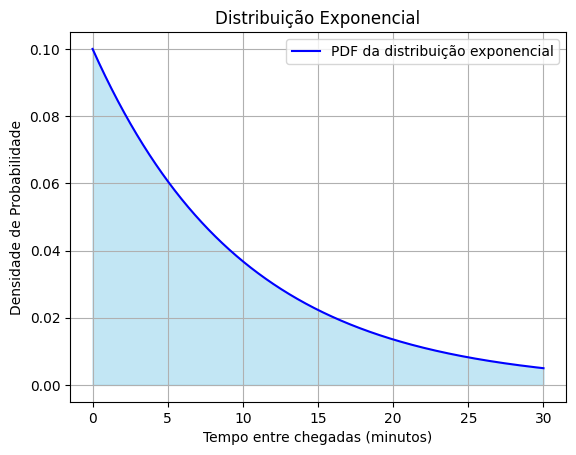

In [25]:

# Parâmetro de taxa da distribuição exponencial (taxa de chegada média de 10 minutos)
taxa_chegada_media = 10

# Criando um objeto da distribuição exponencial com o parâmetro de taxa
distribuicao_exponencial = expon(scale=taxa_chegada_media)

# Criando um intervalo de valores para o tempo entre chegadas (de 0 a 30 minutos)
tempo_entre_chegadas = np.linspace(0, 30, 1000)

# Calculando a função de densidade de probabilidade (PDF) para os tempos entre chegadas
pdf = distribuicao_exponencial.pdf(tempo_entre_chegadas)

# Plotando a PDF da distribuição exponencial
#plt.figure(figsize=(10, 6))#largura e altura em polegadas (opcional)
plt.plot(tempo_entre_chegadas, pdf, color='blue', label='PDF da distribuição exponencial')
plt.fill_between(tempo_entre_chegadas, pdf, color='skyblue', alpha=0.5)
plt.title('Distribuição Exponencial')
plt.xlabel('Tempo entre chegadas (minutos)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


**Calculando a probabilidades dos clientes chegarem entre 6 e 8 minutos (precisamos calcular a densidade de probabilidade acumulada que chamamos de cdf)**

In [26]:
# Parâmetro de taxa da distribuição exponencial (taxa de chegada média de 10 minutos)
taxa_chegada_media = 10

# Criando um objeto da distribuição exponencial com o parâmetro de taxa
distribuicao_exponencial = expon(scale=taxa_chegada_media)

# Calculando a CDF em 8 minutos
cdf_8_min = distribuicao_exponencial.cdf(8)

# Calculando a CDF em 6 minutos
cdf_6_min = distribuicao_exponencial.cdf(6)

# Calculando a probabilidade de chegarem entre 6 e 8 minutos
probabilidade_entre_6_e_8_min = cdf_8_min - cdf_6_min

print("A probabilidade de os clientes chegarem em 6 minutos é:", cdf_6_min)
print("A probabilidade de os clientes chegarem em 8 minutos é:", cdf_8_min)
print("A probabilidade de os clientes chegarem entre 6 e 8 minutos é:", probabilidade_entre_6_e_8_min)


A probabilidade de os clientes chegarem em 6 minutos é: 0.4511883639059735
A probabilidade de os clientes chegarem em 8 minutos é: 0.5506710358827784
A probabilidade de os clientes chegarem entre 6 e 8 minutos é: 0.09948267197680494


**Atenção:** NÃO CONFUNDIR "densidade de probabilidade" com "probabilidade de um evento acontecer.


A densidade de probabilidade é uma medida que descreve a probabilidade relativa de uma variável aleatória contínua assumir diferentes valores. Em termos simples, ela indica como a probabilidade está distribuída ao longo do espaço dos valores possíveis dessa variável.


Quando falamos sobre a densidade de probabilidade em relação a uma variável aleatória contínua, como o tempo entre as chegadas de clientes em uma loja (como no exemplo que estamos considerando), é importante entender que a probabilidade de um evento específico ocorrer em um ponto exato é geralmente zero. Isso ocorre porque existem infinitos pontos possíveis e a probabilidade de cada ponto é infinitesimal.



Então, o que a densidade de probabilidade nos diz é como a probabilidade está "espalhada" ao longo do eixo da variável aleatória. Valores de densidade de probabilidade mais altos indicam que a probabilidade de encontrar a variável aleatória em uma vizinhança próxima daquele valor é maior.



Por exemplo, no caso da distribuição exponencial, que modela o tempo entre eventos em um processo de Poisson, a densidade de probabilidade é mais alta para valores de tempo menores e diminui exponencialmente à medida que o tempo aumenta. Isso significa que é mais provável que os eventos ocorram em intervalos de tempo menores e menos provável que ocorram em intervalos de tempo maiores.

Portanto, a densidade de probabilidade fornece uma descrição da "densidade" ou "concentração" da probabilidade ao longo do espaço dos valores possíveis da variável aleatória contínua.

## **Calculando a Probabilidade de um cliente entrar entre 6 min e 8 min utilizando integral**

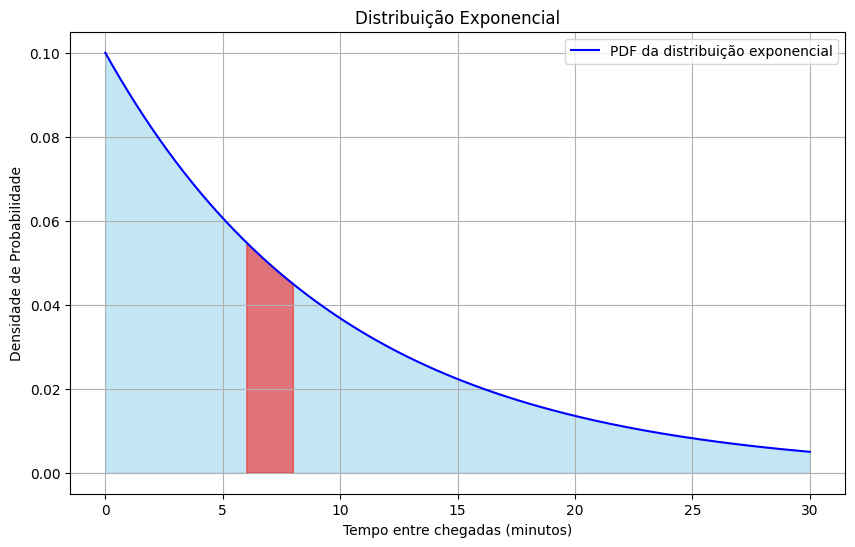

In [27]:
# Criando um intervalo de valores para o tempo entre chegadas (de 0 a 30 minutos)
tempo_entre_chegadas = np.linspace(0, 30, 1000)

# Calculando a função de densidade de probabilidade (PDF) para os tempos entre chegadas
pdf = distribuicao_exponencial.pdf(tempo_entre_chegadas)

# Plotando a PDF da distribuição exponencial
plt.figure(figsize=(10, 6))
plt.plot(tempo_entre_chegadas, pdf, color='blue', label='PDF da distribuição exponencial')
plt.fill_between(tempo_entre_chegadas, pdf, color='skyblue', alpha=0.5)

# Preenchendo a área entre 6 e 8 minutos em vermelho com alpha=0.5
plt.fill_between(tempo_entre_chegadas, pdf, where=(tempo_entre_chegadas >= 6) & (tempo_entre_chegadas <= 8), color='red', alpha=0.5)

plt.title('Distribuição Exponencial')
plt.xlabel('Tempo entre chegadas (minutos)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
from scipy.integrate import quad
import numpy as np

# Definindo a função de densidade de probabilidade (PDF) da distribuição exponencial
def pdf_exponencial(x, taxa_chegada):
    return taxa_chegada * np.exp(-taxa_chegada * x)

# Tempo médio de chegada
tempo_medio_chegada = 10  # minutos

# Calculando a taxa da distribuição exponencial
# λ = 1/E[X]
taxa_chegada = 1 / tempo_medio_chegada  # O inverso do tempo médio é a taxa (lambda)

# Intervalo de integração (de 6 a 8 minutos)
limite_inferior = 6
limite_superior = 8

# Calculando a probabilidade de os clientes chegarem entre 6 e 8 minutos (integral da PDF)
probabilidade_entre_6_e_8_min, _ = quad(pdf_exponencial, limite_inferior, limite_superior, args=(taxa_chegada,))

print("A probabilidade de os clientes chegarem entre 6 e 8 minutos é:", probabilidade_entre_6_e_8_min)


A probabilidade de os clientes chegarem entre 6 e 8 minutos é: 0.09948267197680484


Observando o gráfico anterior, podemos ver que para um tempo de chegada de 5min, temos uma densidade de probabilidade de 0.06 aproximadamente.


Uma densidade de probabilidade de 0.06 aproximadamente para um tempo de 5 minutos significa que a probabilidade relativa de um cliente chegar exatamente em 5 minutos (ou muito próximo desse tempo) é de aproximadamente 0.06.


Porém, é importante ressaltar que, na distribuição exponencial, a probabilidade de um evento ocorrer exatamente em um ponto específico é geralmente zero. Isso ocorre devido à natureza contínua da distribuição exponencial.


Então, o valor de 0.06 para a função de densidade de probabilidade (PDF) em 5 minutos não representa diretamente a probabilidade de um cliente chegar exatamente em 5 minutos, mas sim a densidade relativa da probabilidade na vizinhança desse ponto. Quanto maior o valor da PDF, maior é a densidade da probabilidade nessa região.


Em termos práticos, você pode interpretar que, para a distribuição exponencial com uma PDF de aproximadamente 0.06 em 5 minutos, há uma densidade relativa maior de eventos ocorrendo em torno de 5 minutos em comparação com outras regiões próximas, mas a probabilidade exata de um evento ocorrer exatamente em 5 minutos é extremamente baixa.

In [29]:
from scipy.stats import expon

# Parâmetro de taxa da distribuição exponencial (taxa de chegada média de 10 minutos)
taxa_chegada_media = 10

# Criando um objeto da distribuição exponencial com o parâmetro de taxa
distribuicao_exponencial = expon(scale=taxa_chegada_media)

# Calculando a probabilidade acumulada de um cliente chegar entre 4.99 e 5.01 minutos
probabilidade_entre_499_e_501_sec = distribuicao_exponencial.cdf(5.01) - distribuicao_exponencial.cdf(4.99)

print("A probabilidade de um cliente chegar entre 4.99 e 5.01 minutos é:", probabilidade_entre_499_e_501_sec)


A probabilidade de um cliente chegar entre 4.99 e 5.01 minutos é: 0.0012130615216020546


## **Modelando o tempo de vida de dispositivos eletrônicos**
Um exemplo aplicado comum da distribuição exponencial é modelar o tempo de vida de certos dispositivos eletrônicos ou mecânicos. Vamos considerar o tempo de vida de lâmpadas em uma fábrica. Suponha que as lâmpadas em uma fábrica tenham um **tempo médio de vida de 1000 horas** (E[X]=1000), e que esse tempo de vida siga uma distribuição exponencial.

Com base nesse exemplo, podemos usar a distribuição exponencial para calcular várias probabilidades e estatísticas relacionadas ao tempo de vida das lâmpadas. Por exemplo:



1.   Probabilidade de uma lâmpada durar mais de 1500 horas: Isso pode ser útil para o planejamento de manutenção preventiva.
2.   Tempo médio esperado até a primeira falha: Isso é útil para estimar a confiabilidade do equipamento e planejar substituições.
3.   Probabilidade de uma lâmpada durar menos de 800 horas: Isso pode ser útil para calcular custos de garantia e substituição antecipada.









### **Agora, vamos calcular a probabilidade de uma lâmpada durar mais de 1500 horas, utilizando a distribuição exponencial.**

In [30]:
# Parâmetro de taxa da distribuição exponencial (inverso do tempo médio de vida)
#ou seja λ = 1/E[X] = 1/1000
taxa = 1 / 1000  # em horas^-1

# Criando um objeto da distribuição exponencial com o parâmetro de taxa
distribuicao_exponencial = expon(scale=1/taxa)

# Calculando a probabilidade de uma lâmpada durar mais de 1500 horas
probabilidade_mais_1500_horas = 1 - distribuicao_exponencial.cdf(1500)

print("A probabilidade de uma lâmpada durar mais de 1500 horas é:", probabilidade_mais_1500_horas)


A probabilidade de uma lâmpada durar mais de 1500 horas é: 0.2231301601484298


### **Calcular o tempo médio esperado até a primeira falha**

In [31]:

# Calculando o tempo médio esperado até a primeira falha
tempo_medio_primeira_falha = 1 / taxa

print("O tempo médio esperado até a primeira falha é:", tempo_medio_primeira_falha, "horas")


O tempo médio esperado até a primeira falha é: 1000.0 horas


### **Calcular a probabilidade de uma lâmpada durar menos de 800 horas**

In [32]:
# Definindo o valor de x (tempo de vida máximo desejado)
x = 800

# Calculando a probabilidade de uma lâmpada durar menos de 800 horas
probabilidade_menos_800_horas = distribuicao_exponencial.cdf(x)

print("A probabilidade de uma lâmpada durar menos de 800 horas é:", probabilidade_menos_800_horas)


A probabilidade de uma lâmpada durar menos de 800 horas é: 0.5506710358827784


# **Distribuição Normal**

In [33]:
from scipy.stats import norm
import numpy as np
n = 70
media = 30
desvio_padrao = 6

resultados = np.linspace(0, n, 141)


In [34]:
probabilidades = norm.pdf(x = resultados, loc = media, scale = desvio_padrao)

In [35]:
dados_normal = pd.DataFrame(np.transpose([resultados, probabilidades]),
                            columns = ['resultados', 'probabilidades'])

dados_normal.head()

,resultados,probabilidades
0,0.0,2.477866e-07
1,0.5,3.745638e-07
2,1.0,5.622869e-07
3,1.5,8.382512e-07
4,2.0,1.241008e-06


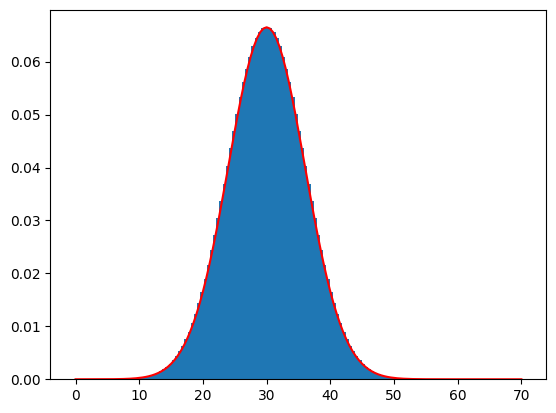

In [36]:
plt.bar(dados_normal['resultados'], dados_normal['probabilidades'])
plt.plot(dados_normal['resultados'], dados_normal['probabilidades'], color = 'red')

**Exemplo**: Projeção de vendas é uma das atividades cruciais no mundo dos negócios.
Por meio das projeções, indústria e varejistas podem definir ofertas, promoções e definição de preços.

Suponha que tenhamos uma distribuição normal que descreve o comportamento das vendas, com média **μ** e desvio padrão **σ**.

Se a meta de vendas for representada por um valor **x**, então podemos calcular a probabilidade de vendas ocorrerem acima da meta utilizando a função de distribuição acumulada (**CDF**) da distribuição normal.

A fórmula para calcular a probabilidade de vendas ocorrerem acima da meta é:

**P(X>x)=1−CDF(x;μ,σ)**

onde **P(X>x)** é a probabilidade de vendas ocorrerem acima da meta **x**.

## **Qual a probabilidade das vendas ocorrem acima da meta? (Vamos considerar que em média (μ) a empresa vende 50 unidades por semana com desvio padrão (σ) de 10 unidades.)**

In [37]:
# Parâmetros da distribuição normal (média e desvio padrão)
mi = 50  # Média das vendas
sigma = 10  # Desvio padrão das vendas

# Meta de vendas
meta_vendas = 60

# Calculando a probabilidade de vendas acima da meta
prob_acima_meta = 1 - norm.cdf(meta_vendas, mi, sigma)

print("A probabilidade das vendas ocorrerem acima da meta é de {:.2%}".format(prob_acima_meta))


A probabilidade das vendas ocorrerem acima da meta é de 15.87%


## **Qual a probabilidade da empresa vender entre 30 e 45 unidades?**


In [47]:
mi = 50  # Média das vendas
sigma = 10  # Desvio padrão das vendas

# Limites do intervalo
limite_inferior = 30
limite_superior = 45

# Calculando a probabilidade das vendas estarem entre 30 e 45 unidades
prob_entre_intervalo = norm.cdf(limite_superior, mi, sigma) - norm.cdf(limite_inferior, mi, sigma)

print(f"A probabilidade das vendas ocorrerem entre {limite_inferior} e {limite_superior} unidades é de {prob_entre_intervalo:.2%}")


A probabilidade das vendas ocorrerem entre 30 e 45 unidades é de 28.58%


## **O Marketing definiu uma meta de vendas para a semana de 85 unidades. Qual a probabilidade desta meta ser atingida?**

In [49]:
mi = 50  # Média das vendas
sigma = 10  # Desvio padrão das vendas

# Meta de vendas
meta_vendas = 85

# Calculando a probabilidade da meta ser atingida
prob_meta_atingida = 1 - norm.cdf(meta_vendas, mi, sigma)

print(f"A probabilidade da meta de vendas de {meta_vendas} unidades ser atingida é de {prob_meta_atingida:.2%}")


A probabilidade da meta de vendas de 85 unidades ser atingida é de 0.02%


# **Distribuição t**

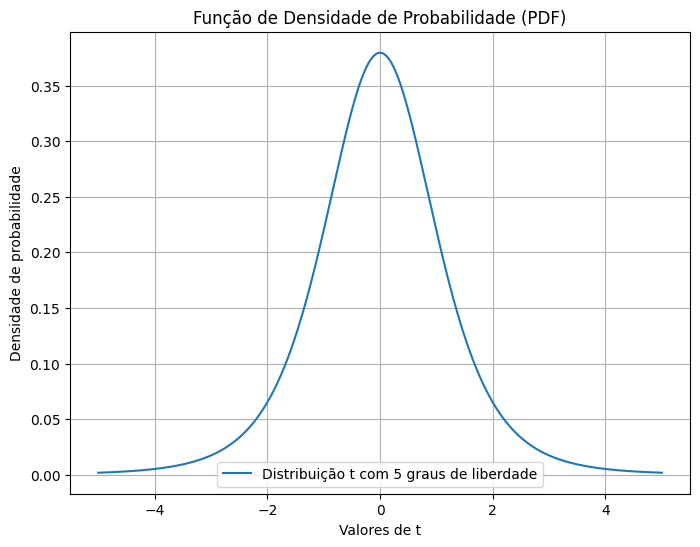

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Definir os graus de liberdade
graus_liberdade = 5

# Gerar pontos no eixo x para o gráfico
x = np.linspace(-5, 5, 1000)

# Calcular a PDF para cada ponto em x
pdf = t.pdf(x, graus_liberdade)

# Plotar a PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Distribuição t com 5 graus de liberdade')
plt.title('Função de Densidade de Probabilidade (PDF)')
plt.xlabel('Valores de t')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True)
plt.show()


# **Distribuição Qui-Quadrado (χ²)**

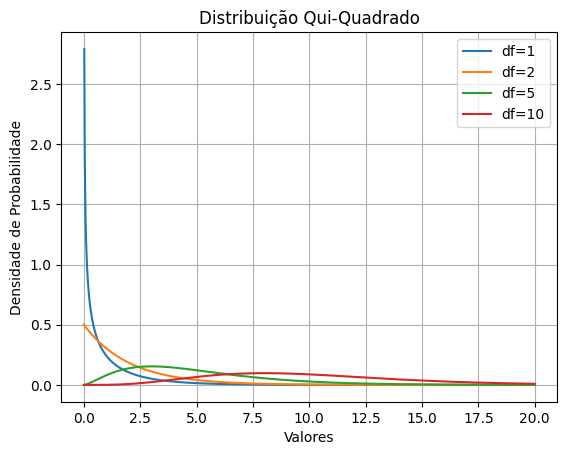

In [40]:
from scipy.stats import chi2

# Faixa de valores para o eixo x
x = np.linspace(0, 20, 1000)

# Graus de liberdade para diferentes distribuições qui-quadrado
graus_liberdade = [1, 2, 5, 10]

# Plotagem das PDFs para diferentes graus de liberdade
for df in graus_liberdade:
    plt.plot(x, chi2.pdf(x, df), label='df={}'.format(df))

# Configurações do gráfico
plt.title('Distribuição Qui-Quadrado')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


# **Distribuição f**

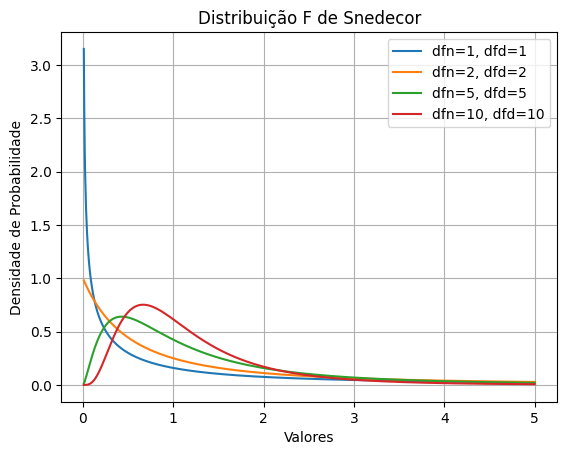

In [41]:
from scipy.stats import f

# Faixa de valores para o eixo x
x = np.linspace(0.01, 5, 1000)  # Começamos em 0.01 para evitar divisão por zero

# Graus de liberdade para diferentes distribuições F
dfn_values = [1, 2, 5, 10]
dfd_values = [1, 2, 5, 10]

# Plotagem das PDFs para diferentes graus de liberdade
for dfn, dfd in zip(dfn_values, dfd_values):
    plt.plot(x, f.pdf(x, dfn, dfd), label='dfn={}, dfd={}'.format(dfn, dfd))

# Configurações do gráfico
plt.title('Distribuição F de Snedecor')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()
